In [1]:
%pylab inline
import numpy as np
import pylab as pl

Populating the interactive namespace from numpy and matplotlib


In [9]:
X = np.c_[ .5, 1].T
y = [.5, 1]
X_test = np.c_[ 0, 2].T

In [10]:
X

array([[0.5],
       [1. ]])

In [11]:
X_test

array([[0],
       [2]], dtype=int32)

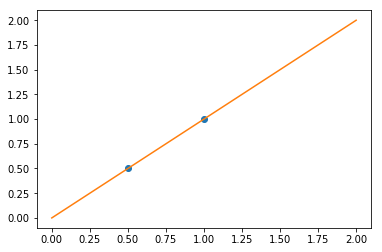

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(X, y)
pl.plot(X, y, 'o')
pl.plot(X_test, regr.predict(X_test))

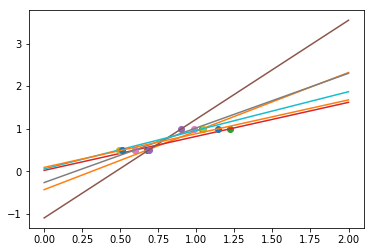

In [17]:
np.random.seed(0)
for _ in range(6):
    noise = np.random.normal(loc=0, scale=.1, size=X.shape)
    noisy_X = X + noise
    pl.plot(noisy_X, y, 'o')  
    regr.fit(noisy_X, y)
    pl.plot(X_test, regr.predict(X_test))

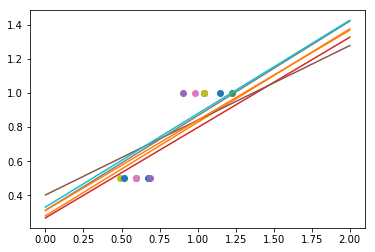

In [21]:
regr = linear_model.Ridge(alpha=.1)
np.random.seed(0)
for _ in range(6):
    noise = np.random.normal(loc=0, scale=.1, size=X.shape)
    noisy_X = X + noise
    pl.plot(noisy_X, y, 'o')  
    regr.fit(noisy_X, y)
    pl.plot(X_test, regr.predict(X_test))

In [26]:
from figures import plot_bias_variance
plot_bias_variance(8, random_seed=42)

ImportError: cannot import name 'plot_bias_variance' from 'figures' (C:\Users\LENOVO\Anaconda3\lib\site-packages\figures\__init__.py)

In [28]:
def test_func(x, err=0.5):
    return np.random.normal(10 - 1/ (x + 0.1), err)

def compute_error(x, y, p):
    yfit = np.polyval(p, x)
    return np.sqrt(np.mean((y - yfit) ** 2))

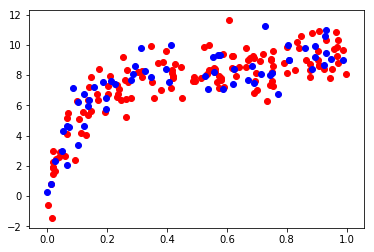

In [34]:
from sklearn.model_selection import train_test_split

N = 200
test_size = 0.3
error = 1.0

# randomly sample the data
np.random.seed(1)
x = np.random.random(N)
y = test_func(x, error)

# split into training, validation, and testing sets.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=test_size)

# show the training and validation sets
plt.scatter(xtrain, ytrain, color='red')
plt.scatter(xtest, ytest, color='blue')

Text(0, 0.5, 'rms error')

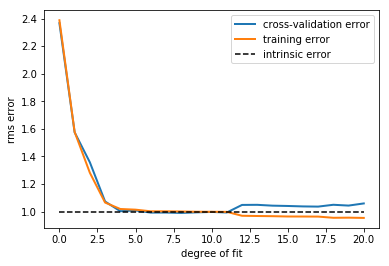

In [36]:
#import warnings
#warnings.filterwarnings('ignore', message='Polyfit*')

degrees = np.arange(21)
train_err = np.zeros(len(degrees))
validation_err = np.zeros(len(degrees))

for i, d in enumerate(degrees):
    p = np.polyfit(xtrain, ytrain, d)

    train_err[i] = compute_error(xtrain, ytrain, p)
    validation_err[i] = compute_error(xtest, ytest, p)

fig, ax = plt.subplots()

ax.plot(degrees, validation_err, lw=2, label = 'cross-validation error')
ax.plot(degrees, train_err, lw=2, label = 'training error')
ax.plot([0, 20], [error, error], '--k', label='intrinsic error')

ax.legend(loc=0)
ax.set_xlabel('degree of fit')
ax.set_ylabel('rms error')

In [37]:
def plot_learning_curve(d, N=200):
    n_sizes = 50
    n_runs = 10
    sizes = np.linspace(2, N, n_sizes).astype(int)
    train_err = np.zeros((n_runs, n_sizes))
    validation_err = np.zeros((n_runs, n_sizes))
    for i in range(n_runs):
        for j, size in enumerate(sizes):
            xtrain, xtest, ytrain, ytest = train_test_split(
                x, y, test_size=test_size, random_state=i)
            # Train on only the first `size` points
            p = np.polyfit(xtrain[:size], ytrain[:size], d)
            
            # Validation error is on the *entire* validation set
            validation_err[i, j] = compute_error(xtest, ytest, p)
            
            # Training error is on only the points used for training
            train_err[i, j] = compute_error(xtrain[:size], ytrain[:size], p)

    fig, ax = plt.subplots()
    ax.plot(sizes, validation_err.mean(axis=0), lw=2, label='mean validation error')
    ax.plot(sizes, train_err.mean(axis=0), lw=2, label='mean training error')
    ax.plot([0, N], [error, error], '--k', label='intrinsic error')

    ax.set_xlabel('traning set size')
    ax.set_ylabel('rms error')
    
    ax.legend(loc=0)
    
    ax.set_xlim(0, N-1)

    ax.set_title('d = %i' % d)


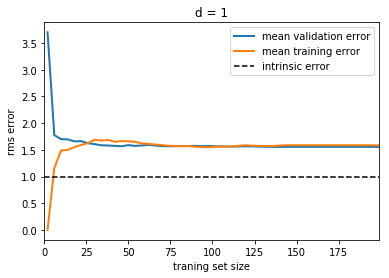

In [45]:
plot_learning_curve(d=1)

(0, 15)

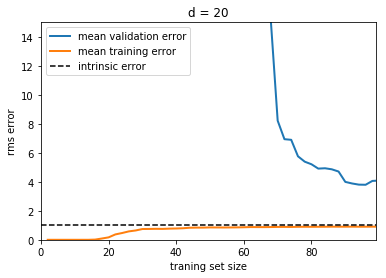

In [48]:
plot_learning_curve(d=20, N=100)
plt.ylim(0, 15)